In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df['target'].value_counts().to_frame()

,target
1,526
0,499


In [4]:
# chia ra âm tính và dương tính
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]
# tách 70% và 30% của từng tập
df_0_70, df_0_30 = train_test_split(df_0, test_size=0.3, random_state = 42)
df_1_70, df_1_30 = train_test_split(df_1, test_size=0.3, random_state = 42)
df_train = pd.concat([df_0_70, df_1_70], axis=0)
df_test = pd.concat([df_0_30, df_1_30], axis=0)
df_train = df_train.sample(frac=1, random_state=42)
df_test = df_test.sample(frac=1, random_state=42)

In [5]:
df_train['target'].value_counts().to_frame(), df_test['target'].value_counts().to_frame()

(   target
 1     368
 0     349,
    target
 1     158
 0     150)

In [6]:
# Tạo bộ dữ liệu train
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:,-1:].values # df.iloc[:,-:-1].values sẽ trả về mảng một chiều
one_b = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((X_train, one_b), axis = 1)
# Tạo bộ dữ liệu test
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:,-1:].values # df.iloc[:,-:-1].values sẽ trả về mảng một chiều
one_b = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((X_test, one_b), axis = 1)



In [7]:
from sklearn.preprocessing import Normalizer
nl = Normalizer()
X_train[:, (3, 4, 7)] = nl.fit_transform(X_train[:, (3, 4, 7)])
X_test[:, (3, 4, 7)] = nl.transform(X_test[:, (3, 4, 7)])

[-0.02641031 -1.53617117  0.85742578  0.70036421  1.19495943  0.12968019
  0.6700975   2.27583263 -1.1991769  -0.53989303  0.63203787 -0.76448391
 -0.8093717   1.50701209]
MSE_train = 0.3620085319127001 sau 100000 vòng lặp
Precision rate train: 0.8380462724935732
Recall rate train: 0.8858695652173914
F1 score train: 0.8612945838837517
Accurate train: 0.8535564853556485


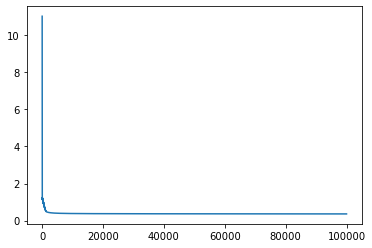

In [8]:
def g_function(X, w_b):
    return X.dot(w_b.reshape(-1, 1)); # (z) mảng w_b ban đầu là mảng 1 chiều dùng reshape để chuyên về nhiều hàng 1 cột, để nhân có hướng với X

def sigmoid(g): # g = w*x + b
    a = 1/(1+np.exp(-g))
    return a
def Loss_function(y, sigmoid_result):
    x = np.log(sigmoid_result)
    x1 = np.log(1 - sigmoid_result)
    a = -(y)*x - (1-y)*x1
    return np.mean(a)
    
def derivative_Loss_wb(X, y, y_predict): 
    a = (y_predict - y)*X
    return np.mean(a, axis=0);
def value_final(y_predict, bound):
    for i in range(0, y_predict.shape[0]):
        if (y_predict[i] > bound):
            y_predict[i] = 1
        else:
            y_predict[i] = 0
    return y_predict;
def accurate_rate(y_predict_final, y):
    return ((y == y_predict_final).sum())/y_predict.shape[0];

def precision_rate(y_predict_final, y):
    # số dự đoán là 1
    true_false_positive = (y_predict_final == 1).sum()
    
    true_positive = (y[(y_predict_final == 1)] ==1).sum() # TP là dự đoán 1 đúng, y_predict_final == 1 thi y cũng == 1 
                                                            # y1=(y_predict_final == 1) ; y2=y_train[(y_predict_final == 1)]; (y2 == 1).sum()
    return true_positive/true_false_positive;
def recall_rate(y_predict_final, y):
    # TP + FN số thực sự là 1
    actual_positive = (y == 1).sum()
    true_positive = (y[(y_predict_final == 1)] ==1).sum() 
    return true_positive/actual_positive;
def F1_rate(pre, rec):
    return 2*pre*rec/(pre+rec);
    
w_b = np.array([1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1])
w_b = w_b*0.3
stored = []; MSE = [];
u = 0.004; 
bound = 0.5
for i in range(0, 100000):
    g = g_function(X_train, w_b)
    y_predict = sigmoid(g)
    stored.append(w_b.copy());
    MSE.append(Loss_function(y_train, y_predict))
    derivate_MSE = derivative_Loss_wb(X_train, y_train, y_predict)
    w_b = w_b - u*derivate_MSE;

w_b = stored[MSE.index(min(MSE))]
print(w_b)
print("MSE_train = {0} sau {1} vòng lặp".format(min(MSE), (MSE.index(min(MSE)) + 1)))
plt.plot(MSE)
# train
g = g_function(X_train, w_b)
y_predict = sigmoid(g)
y_predict_final = value_final(y_predict, bound)
#print(y_predict)
accurate = accurate_rate(y_predict, y_train)
pre = precision_rate(y_predict_final, y_train)
rec = recall_rate(y_predict_final, y_train)
F1 = F1_rate(pre, rec)
print("Precision rate train: {0}\nRecall rate train: {1}\nF1 score train: {2}\nAccurate train: {3}".format(pre, rec, F1, accurate))


In [9]:
# Test
g = g_function(X_test, w_b)
y_predict = sigmoid(g)
y_predict_final = value_final(y_predict, bound)
accurate = accurate_rate(y_predict, y_test)
pre = precision_rate(y_predict_final, y_test)
rec = recall_rate(y_predict_final, y_test)
F1 = F1_rate(pre, rec)
print("Precision rate test: {0}\nRecall rate test: {1}\nF1 score test: {2}\nAccurate test: {3}".format(pre, rec, F1, accurate))


Precision rate test: 0.8372093023255814
Recall rate test: 0.9113924050632911
F1 score test: 0.8727272727272727
Accurate test: 0.8636363636363636


## Tạo bộ dữ liệu để thử với hai thực nghiệm
#### 100+, 349-

In [10]:
df_train['target'].value_counts()

1    368
0    349
Name: target, dtype: int64

In [11]:
df_train_1 = df_train[(df_train['target'] == 1)].iloc[:100]
df_train_0 = df_train[(df_train['target'] == 0)]
df_Experiment = pd.concat([df_train_0, df_train_1], axis = 0)
df_Experiment = df_Experiment.sample(frac=1, random_state=42)

In [12]:
df_Experiment.shape

(449, 14)

In [13]:
df_Experiment['target'].value_counts()

0    349
1    100
Name: target, dtype: int64

In [14]:
X_train = df_Experiment.iloc[:, :-1].values
y_train = df_Experiment.iloc[:,-1:].values # df.iloc[:,-:-1].values sẽ trả về mảng một chiều
one_b = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((X_train, one_b), axis = 1)

In [15]:
X_train.shape, y_train.shape

((449, 14), (449, 1))

In [16]:
df_test['target'].value_counts()

1    158
0    150
Name: target, dtype: int64

#### tạo được bộ dữ liệu thực nghiệm là df_Experiment

### TH1: Không can thiệp hệ số

[-0.00610689 -0.52215418  0.61557587 -0.0157914  -0.00662761  0.17277883
  0.28424904  0.02999976 -0.34486561 -0.65586302  0.30016192 -0.47106951
 -0.61321734 -0.02239886]
MSE_train = 0.29885033798322835 sau 200000 vòng lặp
Precision rate train: 0.8157894736842105
Recall rate train: 0.62
F1 score train: 0.7045454545454546
Accurate train: 0.8841870824053452


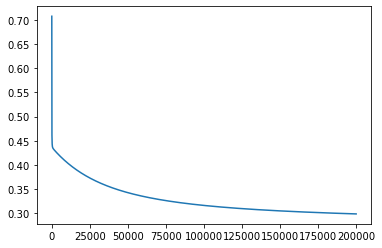

In [23]:
w_b = np.array([1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1])
w_b = w_b*0.00004
stored = []; MSE = [];
u = 0.0001;
bound = 0.5
for i in range(0, 200000):
    g = g_function(X_train, w_b)
    y_predict = sigmoid(g)
    stored.append(w_b.copy());
    MSE.append(Loss_function(y_train, y_predict))
    derivate_MSE = derivative_Loss_wb(X_train, y_train, y_predict)
    w_b = w_b - u*derivate_MSE;

w_b = stored[MSE.index(min(MSE))]
print(w_b)
print("MSE_train = {0} sau {1} vòng lặp".format(min(MSE), (MSE.index(min(MSE)) + 1)))
plt.plot(MSE)
# train
g = g_function(X_train, w_b)
y_predict = sigmoid(g)
y_predict_final = value_final(y_predict, bound)
#print(y_predict)
accurate = accurate_rate(y_predict, y_train)
pre = precision_rate(y_predict_final, y_train)
rec = recall_rate(y_predict_final, y_train)
F1 = F1_rate(pre, rec)
print("Precision rate train: {0}\nRecall rate train: {1}\nF1 score train: {2}\nAccurate train: {3}".format(pre, rec, F1, accurate))

In [24]:
# Test
g = g_function(X_test, w_b)
y_predict = sigmoid(g)
y_predict_final = value_final(y_predict, bound)
accurate = accurate_rate(y_predict, y_test)
pre = precision_rate(y_predict_final, y_test)
rec = recall_rate(y_predict_final, y_test)
F1 = F1_rate(pre, rec)
print("Precision rate test: {0}\nRecall rate test: {1}\nF1 score test: {2}\nAccurate test: {3}".format(pre, rec, F1, accurate))


Precision rate test: 0.9166666666666666
Recall rate test: 0.13924050632911392
F1 score test: 0.24175824175824176
Accurate test: 0.551948051948052


In [25]:
(y_predict_final == 1).sum()

24

### Có can thiệp hệ số


[ 0.00881817 -0.70203012  0.63794784 -0.01666231 -0.00496054  0.27338888
  0.4789558   0.03190049 -0.48458984 -0.73369862  0.40706497 -0.52894263
 -0.80132221  0.00381185]
MSE_train = 0.5215034964954262 sau 200000 vòng lặp
Precision rate train: 0.581081081081081
Recall rate train: 0.86
F1 score train: 0.6935483870967741
Accurate train: 0.8307349665924276


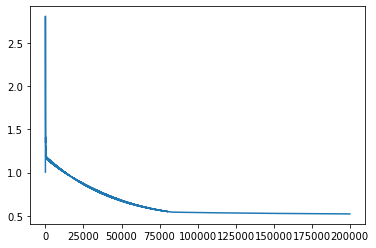

In [26]:
def mod_Loss_function(y, sigmoid_result):
    x = np.log(sigmoid_result)
    x1 = np.log(1 - sigmoid_result)
    a = -3*(y)*x - (1-y)*x1
    return np.mean(a)
def mod_derivative_Loss_wb(X, y, y_predict): 
    a = (y_predict + 2*y*y_predict - 3*y)*X
    return np.mean(a, axis=0);
w_b = np.array([1, 2, 4, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1])
w_b = w_b*0.00004
stored = []; MSE = [];
u = 0.0001; 
bound = 0.5
for i in range(0, 200000):
    g = g_function(X_train, w_b)
    y_predict = sigmoid(g)
    stored.append(w_b.copy());
    MSE.append(mod_Loss_function(y_train, y_predict))
    derivate_MSE = mod_derivative_Loss_wb(X_train, y_train, y_predict)
    w_b = w_b - u*derivate_MSE;

w_b = stored[MSE.index(min(MSE))]
print(w_b)
print("MSE_train = {0} sau {1} vòng lặp".format(min(MSE), (MSE.index(min(MSE)) + 1)))
plt.plot(MSE)
# train
g = g_function(X_train, w_b)
y_predict = sigmoid(g)
y_predict_final = value_final(y_predict, bound)
#print(y_predict)
accurate = accurate_rate(y_predict, y_train)
pre = precision_rate(y_predict_final, y_train)
rec = recall_rate(y_predict_final, y_train)
F1 = F1_rate(pre, rec)
print("Precision rate train: {0}\nRecall rate train: {1}\nF1 score train: {2}\nAccurate train: {3}".format(pre, rec, F1, accurate))

In [21]:
# Test
g = g_function(X_test, w_b)
y_predict = sigmoid(g)
y_predict_final = value_final(y_predict, bound)
accurate = accurate_rate(y_predict, y_test)
pre = precision_rate(y_predict_final, y_test)
rec = recall_rate(y_predict_final, y_test)
F1 = F1_rate(pre, rec)
print("Precision rate test: {0}\nRecall rate test: {1}\nF1 score test: {2}\nAccurate test: {3}".format(pre, rec, F1, accurate))



Precision rate test: 0.9298245614035088
Recall rate test: 0.33544303797468356
F1 score test: 0.49302325581395345
Accurate test: 0.6461038961038961


In [22]:
(y_predict_final == 1).sum()

57